In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot style
sns.set(style="whitegrid")

# Load Task 4 processed data
df = pd.read_csv(
    r"C:\Users\assef\Desktop\Kifiya AI Mastery\week4\credit-risk-model\data\processed\task4_features.csv"
)

df.head()


,CustomerId,Recency,Frequency,Monetary,Cluster,is_high_risk
0,CustomerId_1,1.937605,-0.253459,-0.066891,0,1
1,CustomerId_10,1.937605,-0.253459,-0.066891,0,1
2,CustomerId_1001,2.158882,-0.212186,-0.055849,0,1
3,CustomerId_1002,-0.201408,-0.150278,-0.061655,2,0
4,CustomerId_1003,-0.717722,-0.201868,-0.055849,2,0


In [2]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3742 entries, 0 to 3741
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustomerId    3742 non-null   object 
 1   Recency       3742 non-null   float64
 2   Frequency     3742 non-null   float64
 3   Monetary      3742 non-null   float64
 4   Cluster       3742 non-null   int64  
 5   is_high_risk  3742 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 175.5+ KB


,Recency,Frequency,Monetary,Cluster,is_high_risk
count,3.742000e+03,3.742000e+03,3.742000e+03,3742.000000,3742.000000
mean,4.747079e-17,1.898831e-17,2.800776e-17,1.237039,0.381347
std,1.000134e+00,1.000134e+00,1.000134e+00,0.971492,0.485782
min,-1.123397e+00,-2.534591e-01,-3.867280e+01,0.000000,0.000000
25%,-9.389991e-01,-2.431409e-01,-6.170920e-02,0.000000,0.000000
50%,-2.382879e-01,-1.915502e-01,-5.584873e-02,2.000000,0.000000
75%,8.312186e-01,-5.741433e-02,-3.377694e-02,2.000000,1.000000
max,2.195761e+00,4.194775e+01,3.065193e+01,2.000000,1.000000


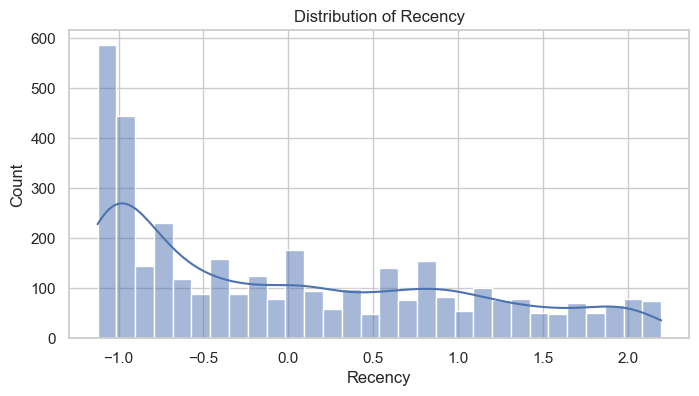

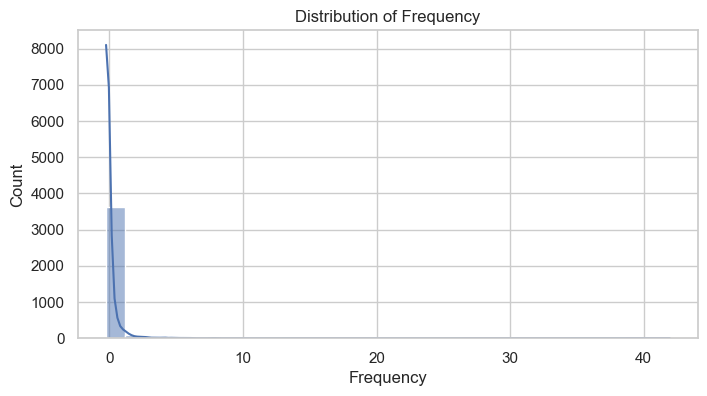

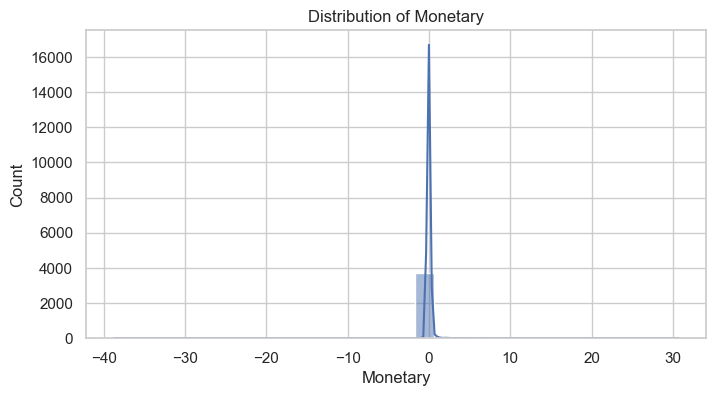

In [3]:
rfm_cols = ['Recency', 'Frequency', 'Monetary']

for col in rfm_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


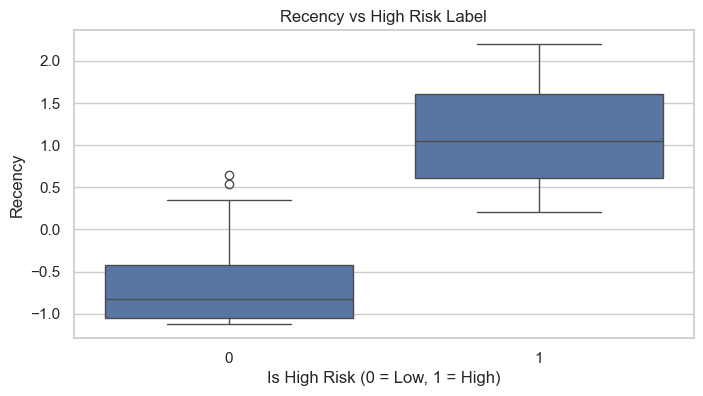

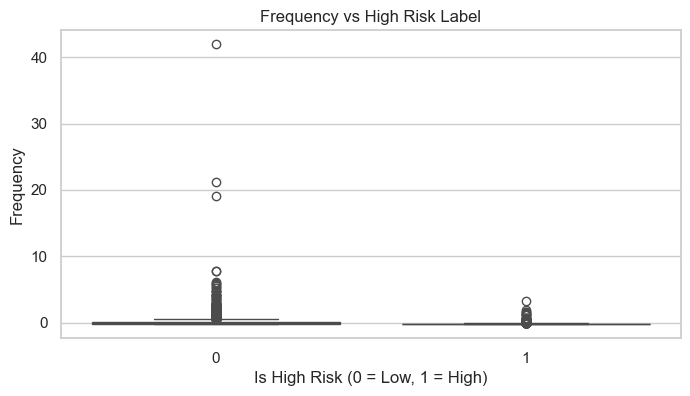

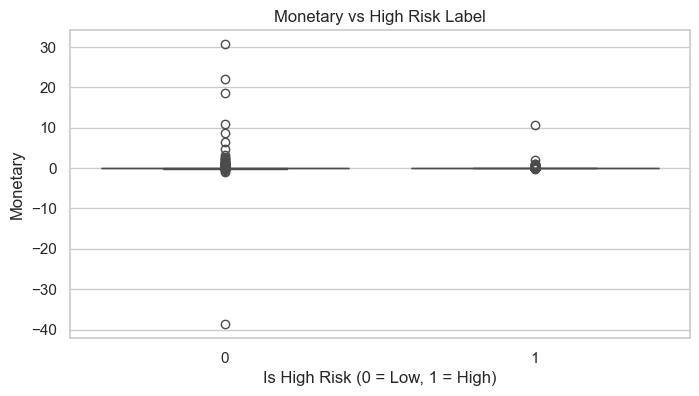

In [4]:
for col in rfm_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='is_high_risk', y=col, data=df)
    plt.title(f'{col} vs High Risk Label')
    plt.xlabel('Is High Risk (0 = Low, 1 = High)')
    plt.ylabel(col)
    plt.show()


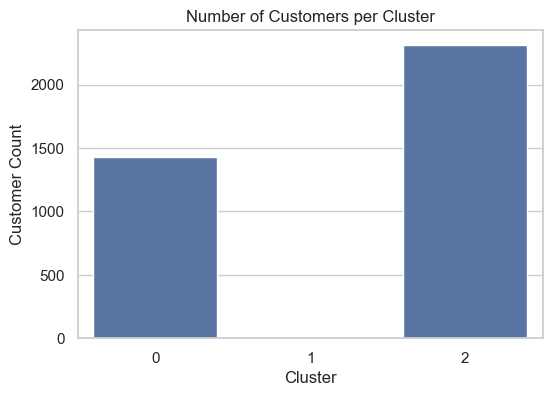

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x='Cluster', data=df)
plt.title('Number of Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Customer Count')
plt.show()


In [6]:
cluster_summary = df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
cluster_summary


,Recency,Frequency,Monetary
Cluster,,,
0,1.121086,-0.184052,-0.033131
1,-0.090770,41.947752,-38.672798
2,-0.691313,0.095374,0.037144


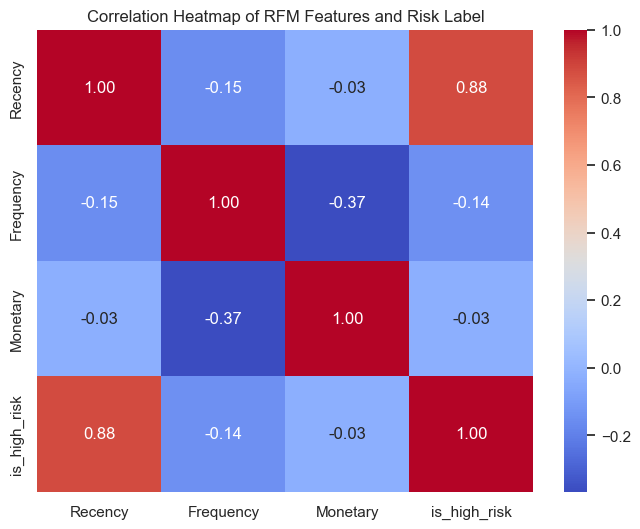

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(
    df[['Recency', 'Frequency', 'Monetary', 'is_high_risk']].corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title('Correlation Heatmap of RFM Features and Risk Label')
plt.show()


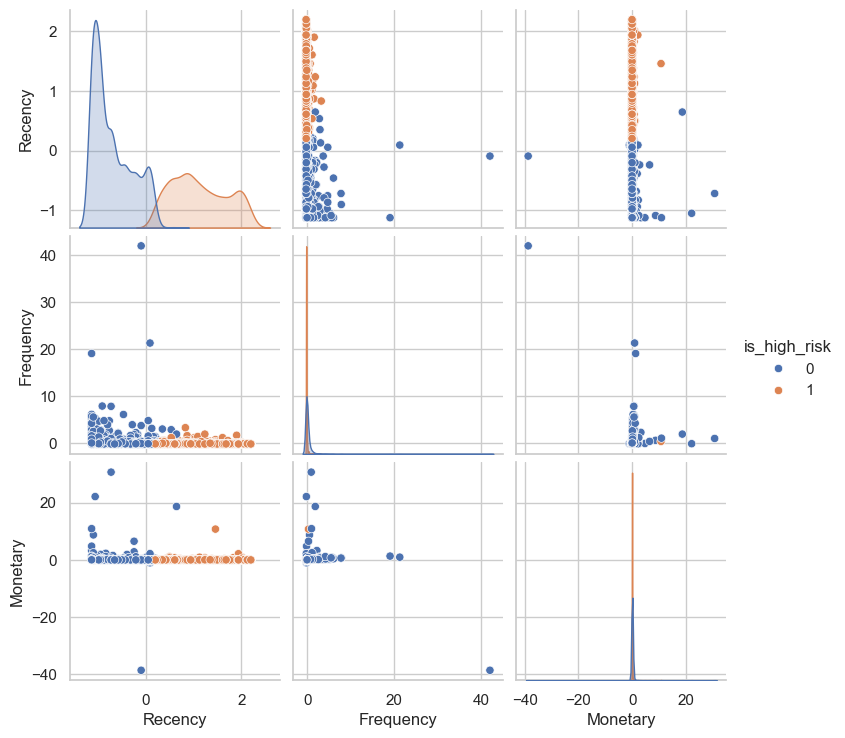

In [8]:
sns.pairplot(
    df[['Recency', 'Frequency', 'Monetary', 'is_high_risk']],
    hue='is_high_risk',
    diag_kind='kde'
)
plt.show()
